## <b/> Importing Libraries

In [12]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l1

import warnings
warnings.filterwarnings('ignore')

## <b/> Loading the Dataset

In [13]:
# Read the labels.csv
labels_all = pd.read_csv('labels.csv')

print(labels_all.shape)

labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


## <b/> Data Preprocessing

In [14]:
# Number of each breeds
breeds_all = labels_all['breed']
breeds_count = breeds_all.value_counts()
breeds_count.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

In [16]:
# Selecting only 3 breeds (limitation due to computational power)
CLASS_NAMES = ['scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [17]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')

# One Hot Encoding
Y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)

# Reading and Converting image into numpy arrays and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Print trained and one hot encoded image shape and size
print('\n Train image shape: ', X_data.shape, ' size: {:,}'.format(X_data.size))
print('One-hot encoded image shape: ', Y_data.shape, ' size: {:,}'.format(Y_data.size))

100%|████████████████████████████████████████| 357/357 [00:01<00:00, 343.28it/s]


 Train image shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded image shape:  (357, 3)  size: 1,071


## <b/> Model Building

In [18]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer=l1(0.0005)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(7,7), activation='relu', kernel_regularizer=l1(0.0005)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer=l1(0.0005)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.0005)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.0005)))
model.add(Dense(len(CLASS_NAMES), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= Adam(0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

## <b/> Splitting the Data

In [19]:
# splitting the dataset into training and testing dataset
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size=0.1)

# splitting the training dataset into training and validation dataset
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2)

## <b/> Training the Model

In [20]:
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_val, Y_val))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.2578 - loss: 4.3078 - val_accuracy: 0.3538 - val_loss: 4.2835
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3464 - loss: 4.2839 - val_accuracy: 0.3231 - val_loss: 4.2754
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3932 - loss: 4.2673 - val_accuracy: 0.2462 - val_loss: 4.2704
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3958 - loss: 4.2539 - val_accuracy: 0.2462 - val_loss: 4.2632
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3984 - loss: 4.2377 - val_accuracy: 0.2615 - val_loss: 4.2532
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3958 - loss: 4.2205 - val_accuracy: 0.2615 - val_loss: 4.2400
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4193 - loss: 4.2031 - val_accuracy: 0.2769 - val_loss: 4.2275
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4427 - loss: 4.1857 - val_accuracy: 0.2769 - val_loss: 4.2152
Epoch 9

## <b/> Plotting the Training History

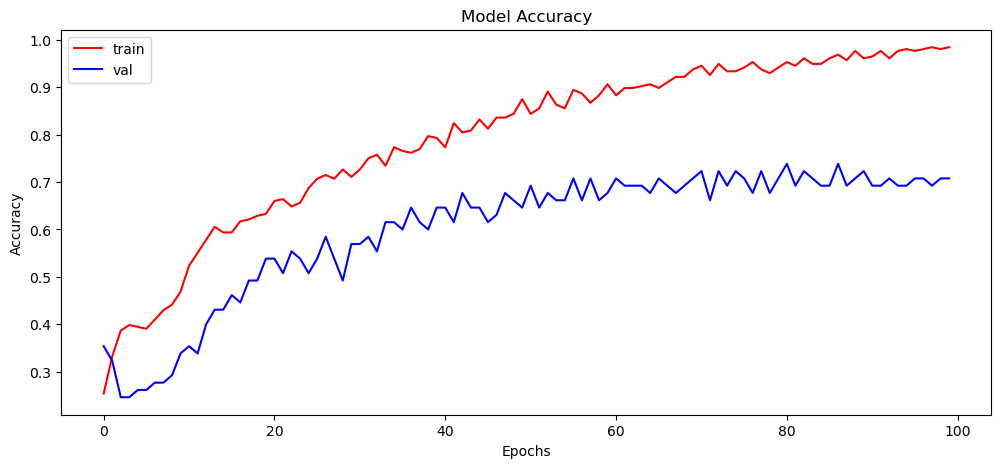

In [21]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

## <b/> Model Testing

In [24]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the Test set: ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7106 - loss: 3.2825
Accuracy over the Test set:  72.22 %


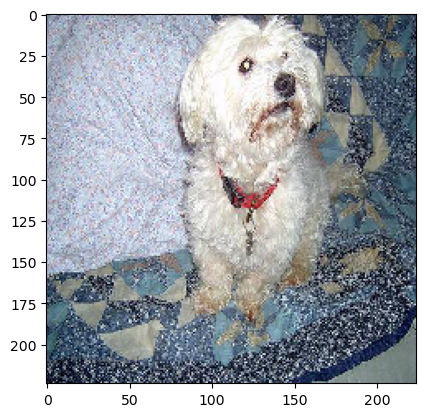

Original :  maltese_dog
Predicted :  maltese_dog


In [35]:
# plotting image to compare
plt.imshow(X_test[2,:,:,:])
plt.show()

# finding max value from prediction list and comparing original value vs predicted
print('Original : ', labels['breed'][np.argmax(Y_test[2])])
print('Predicted : ', labels['breed'][np.argmax(Y_pred[2])])

#### This model is not more accurate on the testing dataset. We can use hyperparameter tuning in the model, to increase the model accuracy.